In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from bosonStar import *
from util import *

from ctypes import *
file = "./testing.so"
my_func = CDLL(file)

#Middle
massInCU = 2e-77
aInCU = 1e-73
totalMassInCU = 0.1
#dtInCU = 1000.0
#bigT = 100000
dtInCU = 2500.0
bigT = 40000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


A2=  -0.3197640202007044  X= 20.65212130424261
A2=  -0.4847073570486533  X= 20.0997201994404
A2=  -0.49962370647516496  X= 40.0
A2=  -0.5019378672698831  X= 16.740033480066963
A2=  -0.5018381151222431  X= 21.703563407126815
A2=  -0.501873065422044  X= 15.347950695901392
A2=  -0.5019294650803621  X= 13.257546515093031
A2=  -0.5019294650803621  X= 13.257546515093031
MU= 0.31816194102760903 MASS= 0.09999058237901089


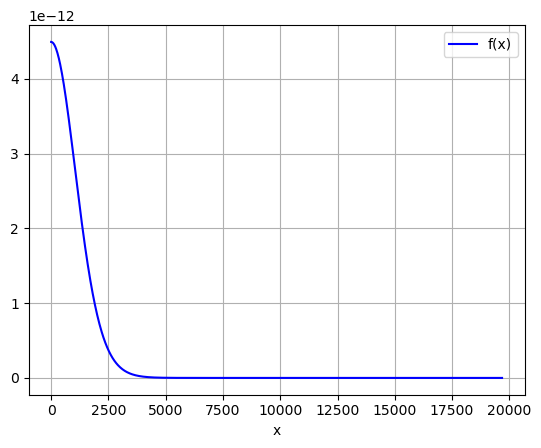

(1000,)


In [2]:
bosonStar = outputProfile(massInCU, aInCU, totalMassInCU)
x = bosonStar["x"]
psi = bosonStar["profile"]

dx = x[1]-x[0]
for i in range(500):
    x = np.append(x, x[-1]+dx)
    psi = np.append(psi, psi[-1])

print(x.shape)

In [3]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 3.8684718785837514e+40
Omega: 3.656129092998465e-43
Epsilon (Should be 1): 1.0000000000000002
Delta: 14.839459489461666
New G: 1.180886665279879


In [4]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
normalization = scipy.integrate.simpson(4.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x=x)
psi = psi/normalization
psi = psi.astype(complex)

for index, value in enumerate(psi):
    if(value<1e-5):
        psi[index] = 0.0

psi = x*psi

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA
dx = x[1]-x[0]

print(psi)
print(dt)

[0.00271691+0.j 0.00814509+0.j 0.0135564 +0.j 0.01893967+0.j
 0.02428383+0.j 0.02957797+0.j 0.03481139+0.j 0.03997361+0.j
 0.04505445+0.j 0.05004403+0.j 0.05493283+0.j 0.05971172+0.j
 0.06437198+0.j 0.06890537+0.j 0.0733041 +0.j 0.0775609 +0.j
 0.081669  +0.j 0.0856222 +0.j 0.08941485+0.j 0.09304187+0.j
 0.09649875+0.j 0.09978158+0.j 0.10288704+0.j 0.1058124 +0.j
 0.1085555 +0.j 0.11111479+0.j 0.11348927+0.j 0.11567851+0.j
 0.11768263+0.j 0.11950228+0.j 0.12113861+0.j 0.12259328+0.j
 0.12386842+0.j 0.12496659+0.j 0.12589077+0.j 0.12664436+0.j
 0.12723111+0.j 0.12765509+0.j 0.1279207 +0.j 0.12803263+0.j
 0.12799579+0.j 0.12781533+0.j 0.12749659+0.j 0.12704508+0.j
 0.12646643+0.j 0.12576638+0.j 0.12495077+0.j 0.12402548+0.j
 0.12299642+0.j 0.12186952+0.j 0.12065069+0.j 0.1193458 +0.j
 0.11796069+0.j 0.11650109+0.j 0.11497269+0.j 0.11338103+0.j
 0.11173157+0.j 0.11002963+0.j 0.10828038+0.j 0.10648886+0.j
 0.10465993+0.j 0.10279831+0.j 0.10090854+0.j 0.09899497+0.j
 0.0970618 +0.j 0.095113

In [5]:
T = np.zeros((size,size)).astype(complex)
TSph = np.zeros((size,size)).astype(complex)
Q = np.zeros((size,size)).astype(complex)
V2Grav = np.zeros((size,size)).astype(complex)
I = np.identity(size).astype(complex)
phi = np.zeros((size))

In [6]:
def setupT():
    global T
    for i in range(size):
        if i==0:
            T[i][i] = -3.0
            T[i][i+1] = 1.0
        elif i==size-1:
            T[i][i] = -1.0
            T[i][i-1] = 1.0
        else:
            T[i][i] = -2.0
            T[i][i+1] = 1.0
            T[i][i-1] = 1.0

    T = -1.0/2.0/dx/dx*T

def setupQ():
    global Q
    for i in range(size):
        Q[i][i] = delta*np.absolute(psi[i]/x[i])*np.absolute(psi[i]/x[i])

def setupV2Grav():
    global V2Grav, phi

    rho = np.absolute(psi)*np.absolute(psi)/x/x
    rho_c = (c_double * size)(*rho)
    phi_c = (c_double * size)(*np.absolute(phi))
    my_func.findGravRho(rho_c, phi_c, c_int(size), c_double(dx))
    for i in range(size):
        phi[i] = phi_c[i] * GM

    for i in range(size):
        V2Grav[i][i] = phi[i]

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0*(T+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0*(T+Q+V2Grav)

0 0.0 0.05839684938758557
1 0.04175513568954264 0.05839762275990459
2 0.08351027137908527 0.05839891158964236
3 0.1252654070686279 0.05840071533445484
4 0.16702054275817055 0.058403033137316415
5 0.2087756784477132 0.058405864055642194
6 0.2505308141372558 0.05840920715738724
7 0.29228594982679845 0.05841306110529473
8 0.3340410855163411 0.05841742389089602
9 0.37579622120588374 0.0584222946110487
10 0.4175513568954264 0.058427670155349574
11 0.45930649258496903 0.0584335496684129
12 0.5010616282745116 0.05843993014119552
13 0.5428167639640543 0.05844680898970762
14 0.5845718996535969 0.05845418439356717
15 0.6263270353431396 0.05846205222836684
16 0.6680821710326822 0.058470411035605956
17 0.7098373067222248 0.058479256236497835
18 0.7515924424117675 0.05848858556704374
19 0.7933475781013101 0.058498395283229206
20 0.8351027137908528 0.0585086812851716
21 0.8768578494803954 0.0585194408787508
22 0.9186129851699381 0.05853066863700891
23 0.9603681208594806 0.05854236224049184
24 1.0021

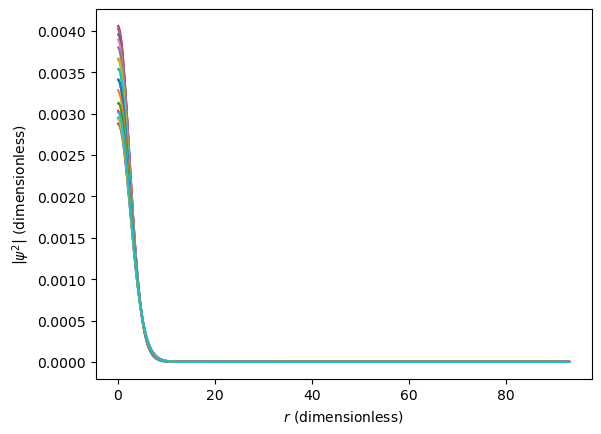

In [7]:
setupT()
setupQ()
setupV2Grav()
setupU1U2()

hello = []
hello2 = []
ts = []
oldGM = GM
newGM = GM*1.2
for t in range(bigT):
    #Pertubation
    if(t*dt<6.0):
        GM = newGM
    if(t*dt>=6.0):
        GM = oldGM

    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    print(t, t*dt, np.absolute(psi[0])/x[0])
    if(GM == oldGM):

        def findMass():
            for i in range(size):
                if(i != 0):
                    temp = scipy.integrate.simpson(4.0*np.pi*np.absolute(psi[:i])*np.absolute(psi[:i]), x=x[:i])
                    if(temp > 0.99):
                        return i
            return size-1
            
        hello2.append(findMass())
        hello.append(np.absolute(psi[0])*np.absolute(psi[0])/x[0]/x[0])
        ts.append(t*dt)

    if t%100 == 0:
        plt.plot(x, np.absolute(psi)*np.absolute(psi)/x/x)

plt.xlabel(r"$r$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

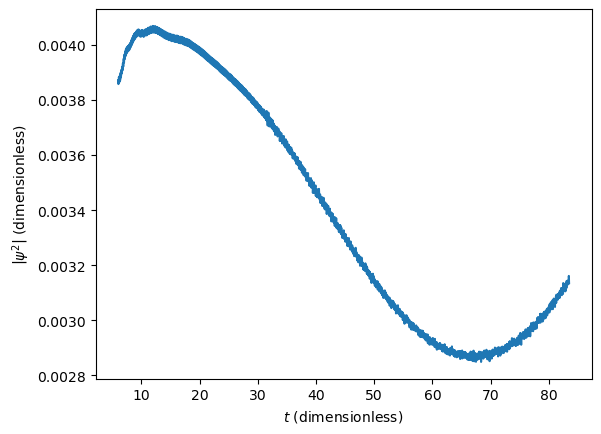

In [8]:
plt.plot(ts, hello)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

Text(0.5, 0, 'f (1/s)')

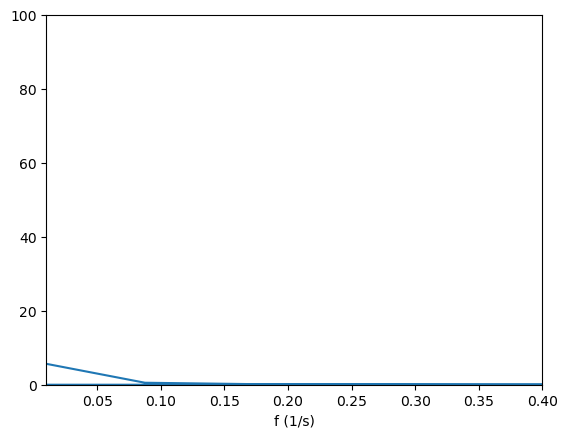

In [9]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100.0)
plt.xlabel("f (1/s)")

In [10]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 0.04 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.0875073275862069


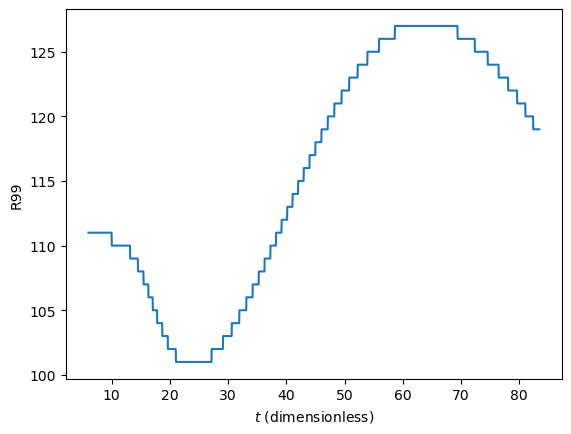

In [11]:
plt.plot(ts, hello2)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"R99")
plt.show()

Text(0.5, 0, 'f (1/s)')

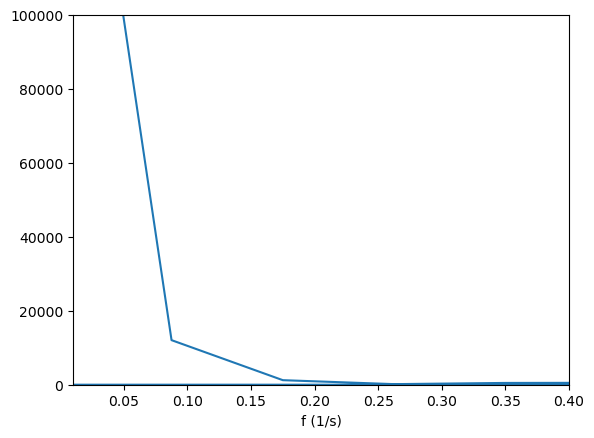

In [12]:
sp = np.fft.fft(hello2)
freq = np.fft.fftfreq(len(hello2), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100000)
plt.xlabel("f (1/s)")

In [13]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 5000 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.0875073275862069


[5.59908656e-02 5.60487407e-02 5.59652094e-02 5.58610535e-02
 5.57215068e-02 5.55265756e-02 5.53172167e-02 5.50473656e-02
 5.47569245e-02 5.44326497e-02 5.40794165e-02 5.36999145e-02
 5.32703012e-02 5.28188345e-02 5.23314695e-02 5.18219793e-02
 5.12831372e-02 5.07103309e-02 5.01226907e-02 4.95056078e-02
 4.88719465e-02 4.82093558e-02 4.75266150e-02 4.68333498e-02
 4.61190654e-02 4.53934896e-02 4.46435904e-02 4.38835630e-02
 4.31128965e-02 4.23282837e-02 4.15370517e-02 4.07318737e-02
 3.99273160e-02 3.91160133e-02 3.82998905e-02 3.74812178e-02
 3.66580751e-02 3.58403658e-02 3.50201890e-02 3.42025744e-02
 3.33862207e-02 3.25723718e-02 3.17645975e-02 3.09590938e-02
 3.01611371e-02 2.93702162e-02 2.85884132e-02 2.78158220e-02
 2.70519614e-02 2.62980892e-02 2.55550064e-02 2.48222063e-02
 2.41013730e-02 2.33930993e-02 2.26963592e-02 2.20127744e-02
 2.13387230e-02 2.06793759e-02 2.00331342e-02 1.94008410e-02
 1.87836246e-02 1.81780170e-02 1.75897113e-02 1.70130230e-02
 1.64506685e-02 1.590153

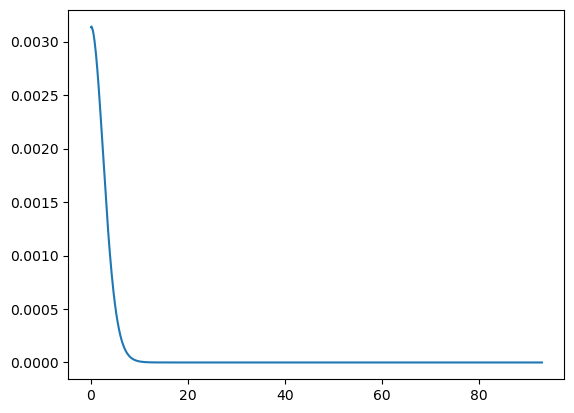

In [14]:
plt.plot(x, np.absolute(psi)*np.absolute(psi)/x/x)
print(np.absolute(psi)/x)

Middle
0.071-0.081			M1 (M2: 0.142-0.162, M3: 0.213-0.243, M4: 0.284-0.324, M5: 0.355-0.405)
0.132-0.137			M1?
0.158-0.163			M2
0.193-0.204			M1?
0.239-0.249			M3
0.295-0.305			M4
0.361-0.371			M5

0.076-0.086			M1
0.132-0.142			M1?
0.158-0.168			M2

Small
0.097-0.107		M1
0.163-0.173		M1?
0.214-0.224		M2
0.270-0.280		M1?
0.341-0.351		M3
0.432-0.443		M4
0.534-0.544		M5
0.651-0.661		M6

Heavy
0.031-0.037		M1
0.058-0.065		M2
0.072-0.078		M?
0.082-0.089		M?
0.099-0.167 	M3
0.116-0.123		M4
0.140-0.147		M5
0.167-0.173		M6?
0.194-0.201 	M7?